In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import sys

sys.path.append("incl/")

import ELPH_utils

In [2]:
# runs = ELPH_utils.load_runs()

# runs_w002 = ELPH_utils.load_runs(filename='../runs_w0.02.npz')
# runs_w003 = ELPH_utils.load_runs(filename='../runs_w0.03.npz')
# runs_w01 = ELPH_utils.load_runs(filename='../runs_w0.1.npz')

# runs = runs[:] + runs_w002[:] + runs_w003 + runs_w01


runs = ELPH_utils.load_runs(filename='../runs_rand_inits.npz')


n_runs = len(runs)
n_kmax = runs[0].shape[0]

print(n_runs, 'loaded with n_kmax =', n_kmax)

500 loaded with n_kmax = 80


runs[0] shape:  (80, 400)


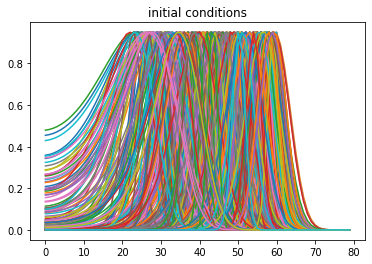

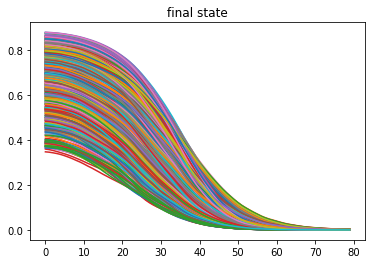

In [3]:
print('runs[0] shape: ', runs[0].shape)

for k in range(n_runs):
    plt.plot(runs[k][:,0])

plt.title('initial conditions')
plt.show()


for k in range(n_runs):
    plt.plot(runs[k][:,-1])

plt.title('final state')
plt.show()

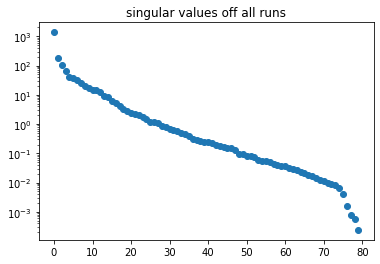

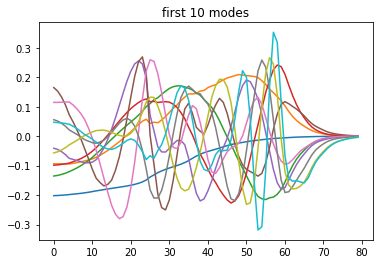

In [4]:
from ELPH_SVDAPPRX import SVDAPPRX

model = SVDAPPRX(runs)
model.train()

plt.semilogy(model.S, 'o')
plt.title('singular values off all runs')
plt.show()

rdim = 10

for l in range(rdim):
  plt.plot(model.U[:,l],  label='Uhat_'+str(l))
plt.title('first ' + str(rdim) + ' modes')
plt.show()


0.013346708461385304


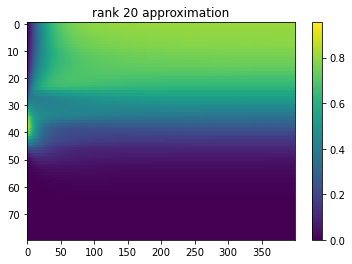

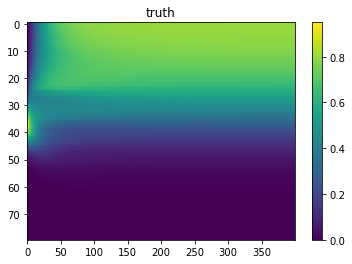

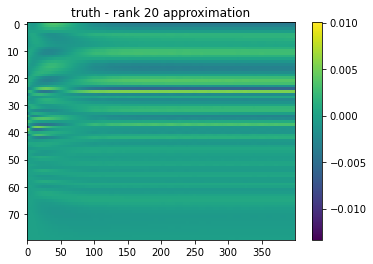

In [5]:
from ELPH_SVDAPPRX import SVDAPPRX


train_runs = runs[::1]
test_run = train_runs.pop(300).copy()

model = SVDAPPRX(train_runs)

wcols = 1.0 + 10.*np.exp(-10.*np.linspace(0,1,runs[0].shape[1]))

model.train(wcols=wcols)


rdim = 20
recon = model.approx_single_run(test_run, rdim=rdim)
print(model.get_error(test_run, recon, norm='max'))

plt.imshow(recon, aspect='auto', interpolation='none')
plt.colorbar()
plt.title('rank ' + str(rdim) + ' approximation')
plt.show()

plt.imshow(test_run, aspect='auto', interpolation='none')
plt.colorbar()
plt.title('truth')
plt.show()

plt.imshow(test_run - recon, aspect='auto', interpolation='none')
plt.colorbar()
plt.title('truth - rank ' + str(rdim) + ' approximation')
plt.show()

# 0.013346708461385304


In [6]:
wcols = 1.0 + 10.*np.exp(-10.*np.linspace(0,1,runs[0].shape[1]))

m,s = ELPH_utils.get_KFold_CV_scores(model, runs, folds=5, seed=817, train_kwargs={'rdim':20, 'wcols':wcols}, score_kwargs={'norm':'max'})
print(m)
print(s)

0.019594527594669134
[0.020928817459480897, 0.01894605530060478, 0.01820611485253179, 0.015240622481886634, 0.024651027878841564]


In [7]:
SVD_approx_err = np.zeros(n_kmax)
for rdim in range(n_kmax):
    SVD_approx_err[rdim] = ELPH_utils.get_KFold_CV_scores(model, runs, folds=5, seed=817, train_kwargs={'rdim':rdim+1}, score_kwargs={'norm':'max'})[0]
    


KeyboardInterrupt: 

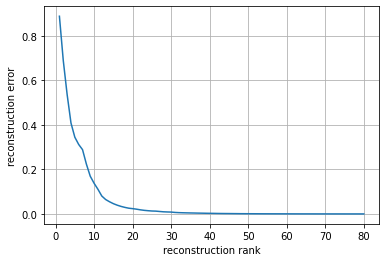

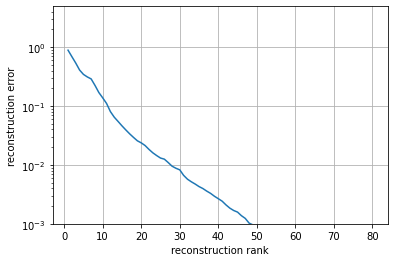

In [39]:
plt.grid()
plt.plot(np.arange(1,n_kmax+1),SVD_approx_err)
plt.xlabel('reconstruction rank')
plt.ylabel('reconstruction error')
plt.show()

plt.grid()
plt.semilogy(np.arange(1,n_kmax+1),SVD_approx_err)
plt.xlabel('reconstruction rank')
plt.ylabel('reconstruction error')
plt.ylim(1e-3,)
plt.show()

In [22]:


err = []
A = np.linspace(0,50,20)
for a in A:
    wcols = 1.0 + a*np.exp(-1.*a*np.linspace(0,1,runs[0].shape[1]))

    m,s = ELPH_utils.get_KFold_CV_scores(model, runs, folds=5, seed=817, train_kwargs={'rdim':20, 'wcols':wcols}, score_kwargs={'norm':'max'})
    print(m)
    err.append(m)
    
    


    
    

0.04605564923644738
0.04600623421778659
0.04599062812531028
0.04598399801238043
0.04598086994792468
0.04597945277255464
0.04597898137517778
0.04597907224623264
0.045979509833512996
0.04598016872402484
0.04604126812593683
0.04375917372109327
0.0421505954229569
0.041211312614609384
0.04094959234421115
0.040865185855932754
0.04084541579522598
0.040926098955966994
0.041047542261328826
0.041172613835732966
0.046040073497140364
0.04432426672363328
0.04331003388258437
0.04159002455881673
0.040478676069382956
0.04036591166869653
0.04071242084120499
0.04116569360224344
0.04156225686180085
0.041897875020945476
0.04603962970334307
0.044799738358180276
0.044992109683510306
0.04358217921819411
0.04188749896695343
0.040785381545244415
0.04071468197826733
0.0413359439464991
0.04191818761171782
0.042411293876040736
0.04603939814272765
0.04509492342551399
0.046461680191959474
0.046119414195934974
0.0444061839518375
0.04262466873263046
0.041579959346637205
0.04146388855172006
0.04203235361512706
0.04260

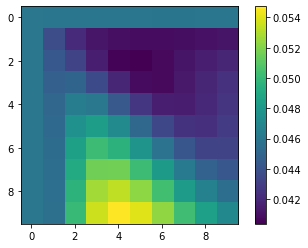

In [24]:


plt.plot(A,err,'o')
plt.show()

